# Rating Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
df = df[['product_name', 'number_of_reviews', 'average_review_rating', 'customer_reviews']]
df.shape

(10000, 4)

In [6]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

## Preprocess the customer reviews

In [7]:
def preprocess(orig):
    
    orig=orig.translate(str.maketrans('', '', string.punctuation))
    
    tokens_o=word_tokenize(orig)

    #lowerCase
    tokens_o = [token.lower() for token in tokens_o]

    #lemmatization
    lemmatizer = WordNetLemmatizer()

    tokens_o = [lemmatizer.lemmatize(w) for w in tokens_o]
    
    fstr = " ".join(tokens_o)
    
    return fstr

## Example of preprocessed review

In [8]:
print(preprocess(df['customer_reviews'][0]))

worth buying for the picture alone a ever 40 6 april 2014 by copnovelist on 6 april 2014 part of the magic for me growing up a a boy wa to buy or be given the new hornby catalogue every year even if it included 90 of the same product a the previous year ive still got my old one dating back to the 70 and 80 somewhere these day the catalogue is especially informative in that it tell you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company amazing detail fabulous photography 50 11 april 2015 by richard on 11 april 2015 amazing detail every credit to the photographer in this book a worthy reference manual a well a a sale brochure even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big train great purchase 50 23 april 2014 by pinkhandbag on 23 april 2014 this wa purchased on behalf of my dad he is always asking me to look up 00 gauge eng

## Using textblob library to perform sentiment analysis and get polarity

In [9]:
import textblob
from textblob import TextBlob

In [10]:
helper = lambda x: 5 if(x>5) else x
pol = lambda x: helper(float(((TextBlob(x).sentiment.polarity+1)*3)))

In [11]:
polarity = pol(preprocess(df['customer_reviews'][0]))
print("Example polarity: ",polarity)

Example polarity:  4.047294900221729


## Handling null values

In [12]:
df.isna().sum()

product_name              0
number_of_reviews        18
average_review_rating    18
customer_reviews         21
dtype: int64

In [13]:
df['number_of_reviews'] = df['number_of_reviews'].fillna("0")
df['average_review_rating'] = df['average_review_rating'].fillna("1.0")
df['customer_reviews'] = df['customer_reviews'].fillna("Neutral")

df.isna().sum()

product_name             0
number_of_reviews        0
average_review_rating    0
customer_reviews         0
dtype: int64

In [14]:
extract_rating = lambda x: float(x.split()[0]) if(x) else "1"

df['average_review_rating'] = df['average_review_rating'].apply(extract_rating)

## Apply sentiment analysis and get polarity

In [15]:
df['polarity'] = df['customer_reviews'].apply(pol)

In [16]:
df.head()

,product_name,number_of_reviews,average_review_rating,customer_reviews,polarity
0,Hornby 2014 Catalogue,15,4.9,Worth Buying For The Pictures Alone (As Ever) ...,4.083880
1,FunkyBuys® Large Christmas Holiday Express Fes...,2,4.5,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,5.000000
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,17,3.9,**Highly Recommended!** // 5.0 // 26 May 2015 ...,3.763589
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,1,5.0,I love it // 5.0 // 22 July 2013 // By\n \n...,4.500000
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,3,4.7,Birthday present // 5.0 // 14 April 2014 // By...,3.879375


In [17]:
X=df.iloc[:,4].values
y=df.iloc[:,2].values

## Visualize how actual rating varies with polarity

<AxesSubplot:>

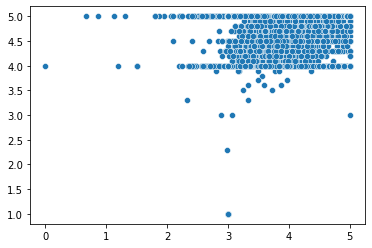

In [18]:
import seaborn as sns
sns.scatterplot(x=X, y = y)

In [19]:
import matplotlib.pyplot as plt

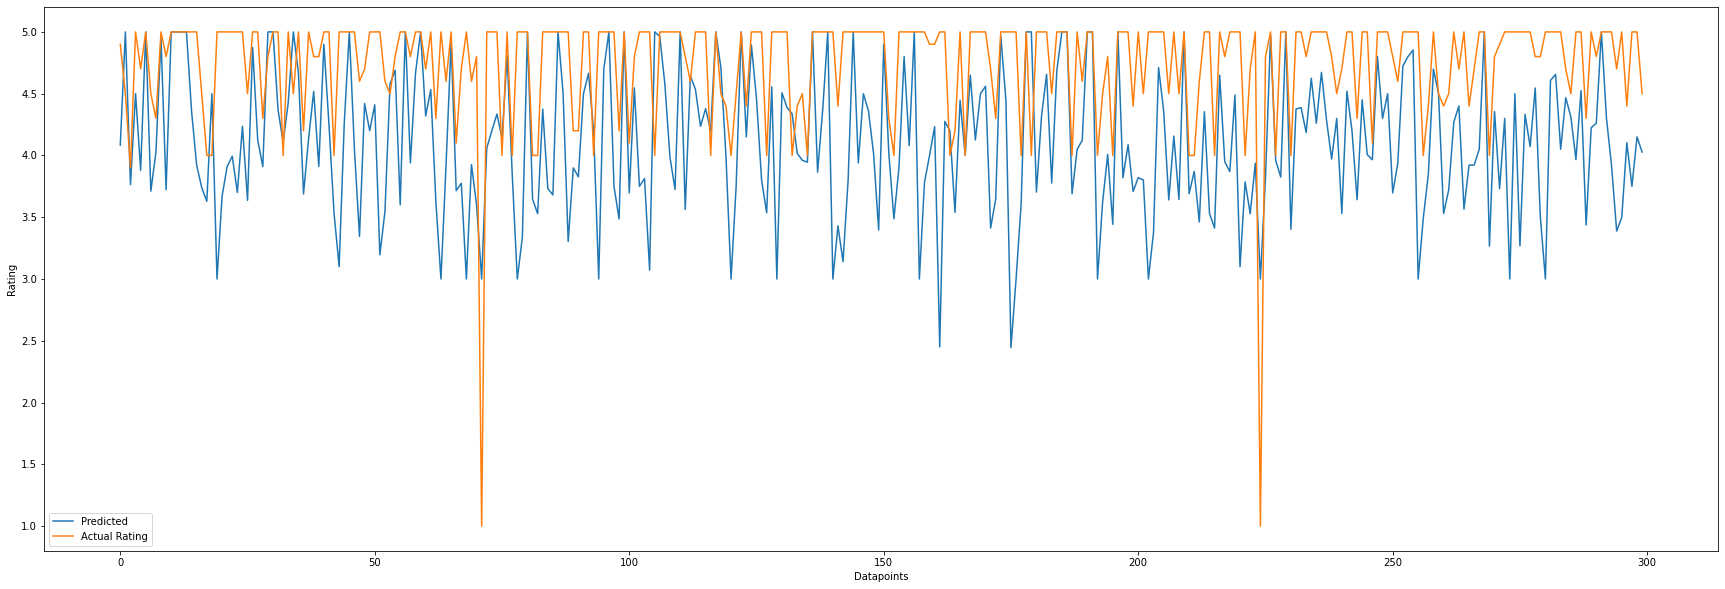

In [20]:
plt.figure(figsize=(30,10))

plt.plot(X[:300], label='Predicted')
plt.xlabel('Datapoints')
plt.plot(y[:300], label='Actual Rating')
plt.ylabel('Rating')
plt.legend()

In [21]:
score = 0

for i in range(len(y)):
    if abs(X[i] - y[i]) <= 0.5:
        score+=1
        
print("Custom accuracy score:", score/len(y)*100)

Custom accuracy score: 44.26


In [22]:
X = X.reshape(-1, 1)
X

array([[4.08388027],
       [5.        ],
       [3.76358929],
       ...,
       [5.        ],
       [3.10402462],
       [3.63113066]])

## Test / Train Split

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Train the Model

In [24]:
from sklearn.linear_model import LinearRegression 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.19773177]


In [26]:
predictions = lm.predict(X_test)

## Visualize the results

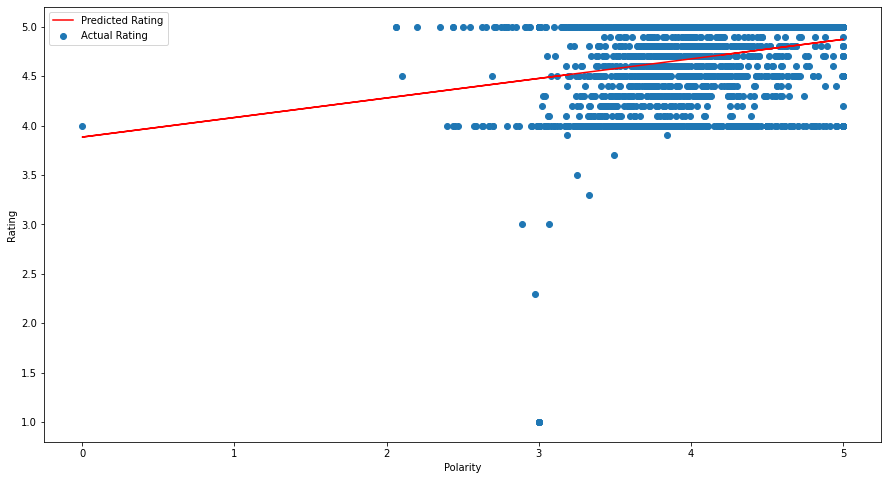

In [27]:
plt.figure(figsize=(15,8))

plt.scatter(X_test,y_test, label='Actual Rating')
plt.plot(X_test, predictions, color='red', label='Predicted Rating')
plt.xlabel('Polarity')
plt.ylabel('Rating')
plt.legend()

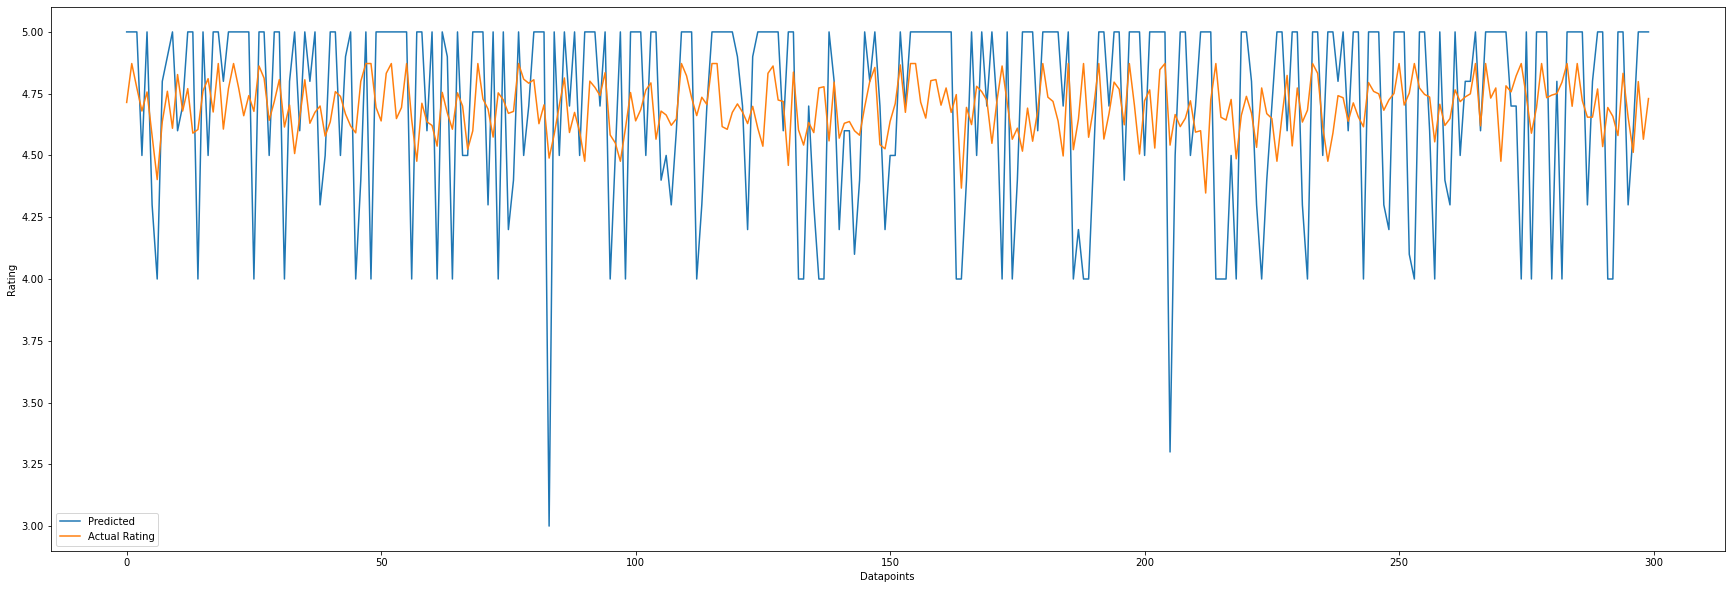

In [28]:
plt.figure(figsize=(30,10))

plt.plot(y_test[:300], label='Predicted')
plt.xlabel('Datapoints')
plt.plot(predictions[:300], label='Actual Rating')
plt.ylabel('Rating')
plt.legend()

## Estimated the Errors

In [29]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3023469291169097
MSE: 0.150984939678409
RMSE: 0.38856780576677863


In [30]:
score = 0

for i in range(len(predictions)):
    if abs(predictions[i] - y_test[i]) <= 0.5:
        score+=1
        
print("Custom accuracy score:", score/len(predictions)*100)

Custom accuracy score: 83.76666666666667


## Predict the rating for your own reviews

In [31]:
def pred_rat_from_review(review):
    x = np.array([pol(preprocess(review))])
    print("Polarity of Review:", x[0])
    x = x.reshape(-1,1)
    print("Predicted Rating:",lm.predict(x)[0])
    print()

In [32]:
rev = input("Enter your Review: ")
pred_rat_from_review(rev)c

Enter your Review: not good
Polarity of Review: 1.9500000000000002
Predicted Rating: 4.2689171189434125



In [39]:
rev = input("Enter your Review: ")
pred_rat_from_review(rev)

Enter your Review: very good
Polarity of Review: 5
Predicted Rating: 4.871999014598082



# Testing

In [33]:
arr = [[i/10] for i in range(0,51)]
arr = np.array(arr)
# arr.reshape(-1,1)
# print(arr)
print(lm.predict(arr) )

[3.88334017 3.90311335 3.92288652 3.9426597  3.96243288 3.98220605
 4.00197923 4.02175241 4.04152558 4.06129876 4.08107194 4.10084512
 4.12061829 4.14039147 4.16016465 4.17993782 4.199711   4.21948418
 4.23925735 4.25903053 4.27880371 4.29857688 4.31835006 4.33812324
 4.35789642 4.37766959 4.39744277 4.41721595 4.43698912 4.4567623
 4.47653548 4.49630865 4.51608183 4.53585501 4.55562818 4.57540136
 4.59517454 4.61494771 4.63472089 4.65449407 4.67426725 4.69404042
 4.7138136  4.73358678 4.75335995 4.77313313 4.79290631 4.81267948
 4.83245266 4.85222584 4.87199901]


In [34]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [35]:
poly_predictions = lin2.predict(poly.fit_transform(X_test))

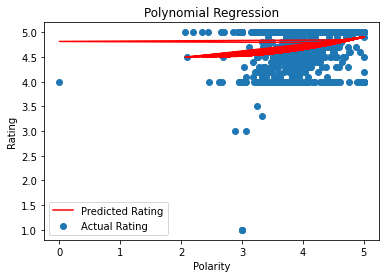

In [36]:
plt.title('Polynomial Regression')

plt.scatter(X_test[:1000], y_test[:1000], label='Actual Rating')
plt.plot(X_test[:1000], poly_predictions[:1000], color='red', label='Predicted Rating')
plt.xlabel('Polarity')
plt.ylabel('Rating')
plt.legend()

In [37]:
score = 0

for i in range(len(poly_predictions)):
    if abs(poly_predictions[i] - y_test[i]) <= 0.5:
        score+=1
        
print("Custom accuracy score:", score/len(poly_predictions)*100)

Custom accuracy score: 85.9
